In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Change default colours to personal colour scheme
import matplotlib as mpl
mpl.rcParams['axes.prop_cycle'] = mpl.cycler(color=["indianred", "cornflowerblue", "mediumseagreen", "plum", "sandybrown"]) 

In [4]:
rootPath = r"/home/daraghhollman/Main/UCD_PASS_Labs/Electronics/Excercises"

In [5]:
def LoadFile(path, skiprows=2):
    data = np.array(np.loadtxt(path, skiprows=skiprows))
    return data

# Exercise 5

In [ ]:
def RC_Voltage(t, V_i, d, H):

    if type(t) == list:
        VOutput = []

        for time in t:
            V = V_i * np.exp(-time/(d)) + H
            VOutput.append(V)
    else:
        VOutput = V_i * np.exp(-t/(d)) + H

    return VOutput

In [ ]:
ex5 = LoadFile(rootPath + r"/ex5/ex5.txt")
ex5Sim = LoadFile(rootPath + r"/ex5/sim.txt")

In [ ]:
plt.plot(ex5Sim[:,0], [el/2 for el in ex5Sim[:,1]], label="Simulation")
plt.grid()
plt.legend()

In [ ]:
def Ex5Plot(data):

    xValues = [el - min(data[:,0]) for el in data[:,0]]
    channel01 = data[:,1]
    channel02 = data[:,2]

    fig, axes = plt.subplots(2,1, figsize=(6, 8))

    axes[0].plot(xValues, channel01, label="Channel 1")
    axes[0].plot(xValues, channel02, label="Channel 2")

    axes[1].set_xlim((0, 0.025))
    axes[1].plot(xValues, channel01, label="Channel 1")
    axes[1].plot(xValues, channel02, label="Channel 2")
    axes[1].plot(xValues, RC_Voltage(xValues, 5, 1e3, 1e-6, 0), label="Analytical Solution")

    for i in range(len(axes)):
        axes[i].set_xlabel("Time (s)")
        axes[i].set_ylabel("Voltage (V)")
        axes[i].grid()
        axes[i].legend()

In [ ]:
Ex5Plot(ex5)

In [ ]:
# Calculate and compare decay constants
def AnalyticalDecayConstant(R, C):
    return 1 / (R*C)

analyticalDecayConstant = AnalyticalDecayConstant(1e3, 1e-6)

In [ ]:
def CalculateDecayConstant(data, plotData=False, plotFit=False):
    tValues = [el - min(data[:,0]) for el in data[:,0]]

    channel01 = data[:,1]
    channel02 = data[:,2]
    
    pars, cov = curve_fit(RC_Voltage, tValues[0:250], channel02[0:250], [5, 1e-3, 0])

    if plotData:
        plt.plot(tValues[0:250], channel02[0:250], label="Data")
    
    if plotFit:
        plt.plot(tValues[0:250], RC_Voltage(tValues[0:250], pars[0], pars[1], pars[2]))

    if plotData or plotFit:
        plt.xlabel("Time (s)")
        plt.ylabel("Voltage (V)")
        plt.grid()
        plt.legend()

    decayConstant = 1 / (pars[1])
    print(pars)
    print(cov)
    return decayConstant

measuredDecayConstant = CalculateDecayConstant(ex5, plotData=True, plotFit=True)

[ 9.57363572e+01  9.87280306e-04 -2.18435123e-02]
[[ 8.59273548e-01 -3.72427125e-06  2.36644431e-03]
 [-3.72427125e-06  1.64580096e-11 -1.27551292e-08]
 [ 2.36644431e-03 -1.27551292e-08  5.29188536e-05]]


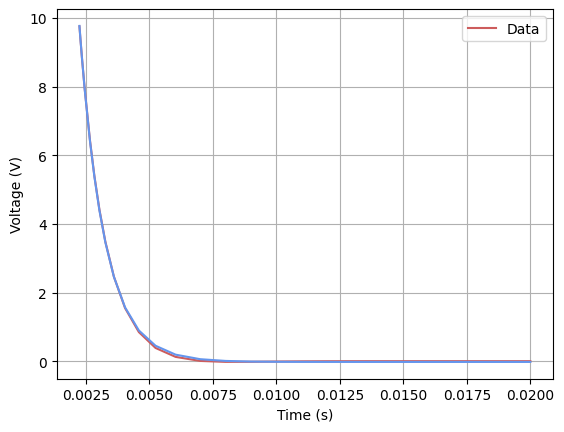

In [26]:
ex5SimData = LoadFile(rootPath + r"/ex5/sim.txt")

def SimDecayConstant(data, plotData=False, plotFit=False):
    
    tValues = [el - min(data[:,0]) for el in data[:,0]][10:40]

    channel01 = data[:,1][10:40]
    channel02 = data[:,2][10:40]
    
    pars, cov = curve_fit(RC_Voltage, tValues, channel01, [5, 1e-3, 0])

    if plotData:
        plt.plot(tValues, channel01, label="Data")
    
    if plotFit:
        plt.plot(tValues, RC_Voltage(tValues, pars[0], pars[1], pars[2]))

    if plotData or plotFit:
        plt.xlabel("Time (s)")
        plt.ylabel("Voltage (V)")
        plt.grid()
        plt.legend()

    decayConstant = 1 / (pars[1])
    print(pars)
    print(cov)
    return decayConstant

simDecayConstant = SimDecayConstant(ex5SimData, plotData=True, plotFit=True)

In [27]:
print(f"Decay Constants:\nMeasured: {measuredDecayConstant}\nAnalytical: {analyticalDecayConstant}\nSimulated: {simDecayConstant}")

Decay Constants:
Measured: 895.9265366569717
Analytical: 1000.0
Simulated: 1012.8835687223026


# Exercise 7

In [5]:
phaseAmpMeasuredData = LoadFile(rootPath + r"/ex7/phaseAmplitude.txt")
gainSimData = LoadFile(rootPath + r"/ex7/gainSim.txt")
phaseSimData = LoadFile(rootPath + r"/ex7/phaseSim.txt")

In [6]:
def MeasuredGain(V2, V1):
    return 20 * np.log10(V2/V1)

def AnalyticalPhase(frequency, R, C):
    return (180/np.pi)*np.arctan(1 / (np.pi*2*frequency * R * C))

def AnalyticalGain(frequency, R, C):
    return (2*np.pi*frequency * R * C) / np.sqrt(1 + (2*np.pi*frequency * R * C)**2)

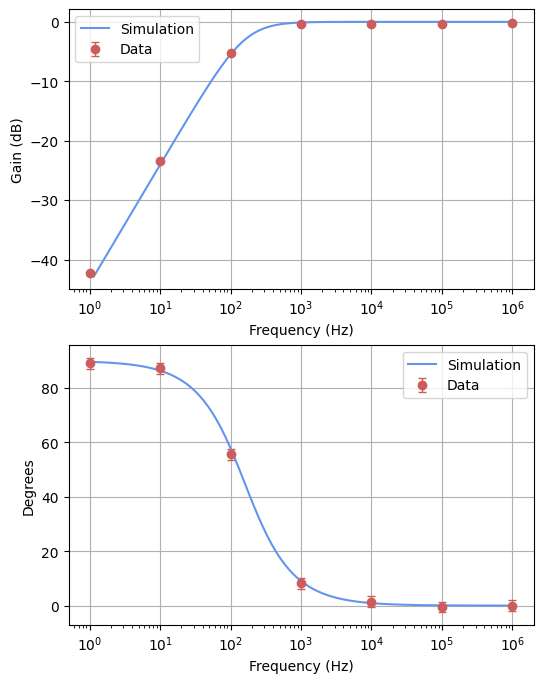

In [8]:
def BodePlot(data, simGainData, simPhaseData):
    frequency = data[:,0]
    simGainFrequency = simGainData[:,0]
    simPhaseFrequency = simPhaseData[:,0]

    fRange = np.arange(np.min(frequency), np.max(frequency), 10)

    amplitude = data[:,1]
    gain = [MeasuredGain(V2=voltage, V1=1) for voltage in amplitude]
    simGain = simGainData[:,1]

    phase = data[:,2]
    simPhase = simPhaseData[:,1]

    fig, axes = plt.subplots(2,1, figsize=(6, 8))

    axes[0].errorbar(frequency, gain, yerr=0.1, fmt="o", capsize=3, linewidth=1, label="Data")
    axes[0].plot(simGainFrequency, simGain, label="Simulation")
    #axes[0].plot(fRange, AnalyticalGain(fRange, 1e3, 1e-6), label="Analytical")
    axes[0].set_ylabel("Gain (dB)")
    
    axes[1].errorbar(frequency, phase, yerr=2, fmt="o", capsize=3, linewidth=1, label="Data")
    axes[1].plot(simPhaseFrequency, simPhase, label="Simulation")
    #axes[1].plot(fRange, AnalyticalPhase(fRange, 1e3, 1e-6), label="Analytical")
    axes[1].set_ylabel("Degrees")

    for i in range(len(axes)):
        axes[i].set_xlabel("Frequency (Hz)")
        axes[i].grid()
        axes[i].legend()
        axes[i].set_xscale("log")

BodePlot(phaseAmpMeasuredData, gainSimData, phaseSimData)

# Exercise 12

In [6]:
ex12LinearData = LoadFile(rootPath + r"/ex12/forwardMeasurment.txt")

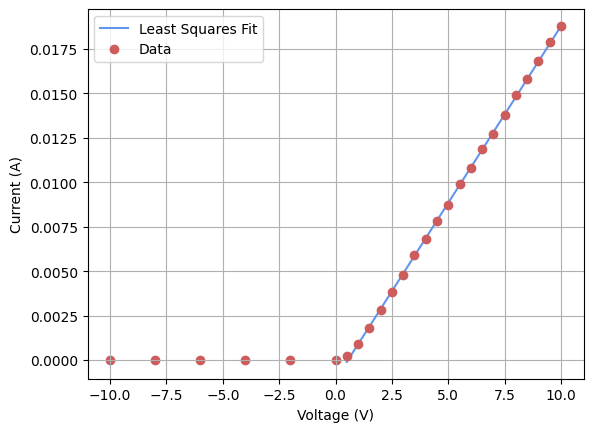

In [35]:
def LinearFunction(x, m, c):
    return x*m + c

def Ex12LinearFowardsBias(data):

    pars, cov = curve_fit(LinearFunction, data[:,0], data[:,1])
    voltageRange = np.arange(np.min(data[:,0]), np.max(data[:,0]), 0.1)

    plt.errorbar(data[:,0], data[:,1], fmt="o", label="Data")
    plt.plot(voltageRange, LinearFunction(voltageRange, pars[0], pars[1]), label="Least Squares Fit")
    plt.scatter(np.arange(0, -11, -2), [0 for i in range(6)])

    plt.grid()
    plt.legend()
    plt.xlabel("Voltage (V)")
    plt.ylabel("Current (A)")

Ex12LinearFowardsBias(ex12LinearData)

In [8]:
ex12SinData = LoadFile(rootPath + r"/ex12/sinWave.txt")
ex12SinWithCapData = LoadFile(rootPath + r"/ex12/sinWaveWithCap.txt")

In [21]:
# Plotting sin input before capacitor

def ex12SinPlot(data):

    xValues = [el - min(data[:,0]) for el in data[:,0]]
    channel01 = data[:,1]
    channel02 = data[:,2]

    difference = [-(a + b) for a, b in zip(channel01, channel02)]

    plt.plot(xValues, difference, label="Voltage drop across resistor")

    plt.plot(xValues, channel01, alpha=0.4, label="Voltage before resistor")
    plt.plot(xValues, channel02, alpha=0.4, label="Voltage after resistor")

    plt.grid()
    plt.legend()
    plt.xlabel("Time (s)")
    plt.ylabel("Voltage (V)")


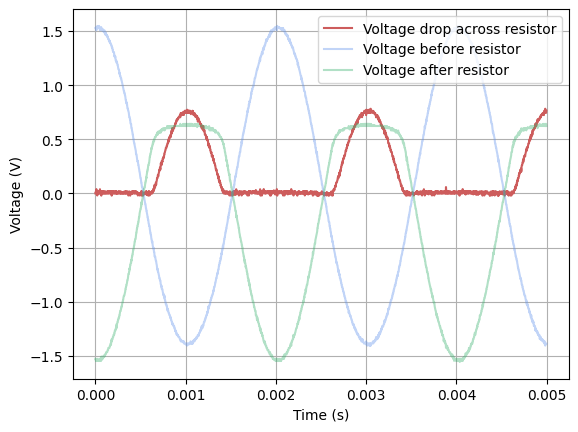

In [22]:
ex12SinPlot(ex12SinData)

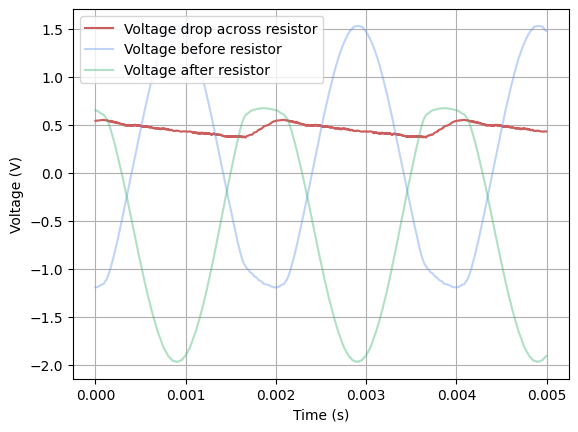

In [23]:
ex12SinPlot(ex12SinWithCapData)

# Exercise 20

In [8]:
dataR1 = LoadFile(rootPath + r"/ex20/R1.txt", skiprows=1)
dataR2 = LoadFile(rootPath + r"/ex20/R2.txt", skiprows=1)
dataR3 = LoadFile(rootPath + r"/ex20/R3.txt", skiprows=1)
dataR4 = LoadFile(rootPath + r"/ex20/R4.txt", skiprows=1)
ex20Data = [dataR1, dataR2, dataR3, dataR4]

Text(0, 0.5, 'Output Voltage (V)')

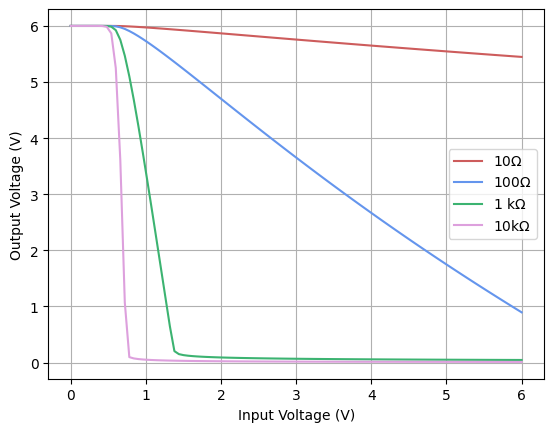

In [15]:
labels = ["10", "100", "1 k", "10k"]

for i, data in enumerate(ex20Data):
    plt.plot(data[:,0], data[:,1], label=f"{labels[i]}$\Omega$")

plt.grid()
plt.legend()
plt.xlabel("Input Voltage (V)")
plt.ylabel("Output Voltage (V)")

# Exercise 25

In [27]:
opAmpFrequencyData = LoadFile(rootPath + r"/ex25/frequencyResponse.txt")
opAmpFrequencyDataWithCapactitor = LoadFile(rootPath + r"/ex25/frequencyResponseWithCapacitor.txt")

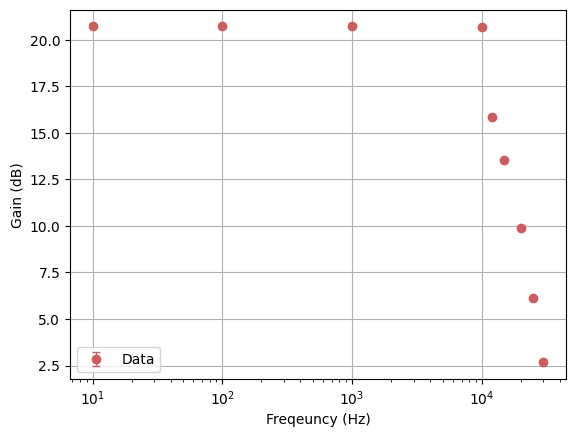

In [50]:
inputVoltage = 0.5
gain = [20*np.log10(voltage/inputVoltage) for voltage in opAmpFrequencyData[:,1]]

plt.errorbar(opAmpFrequencyData[:,0], gain, fmt="o", yerr=0, label="Data", capsize=3, linewidth=1)
plt.xscale("log")
plt.xlabel("Freqeuncy (Hz)")
plt.ylabel("Gain (dB)")
plt.grid()
plt.legend()

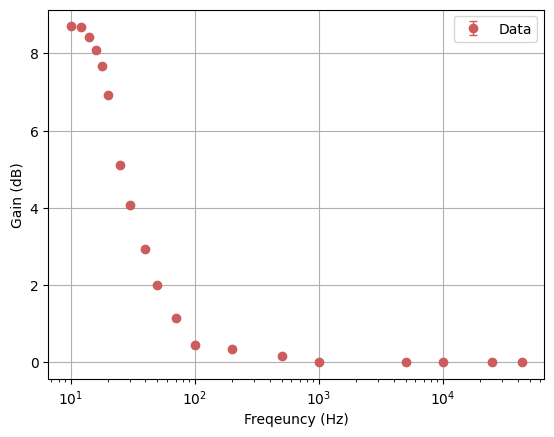

In [51]:
gainWithCap = [20*np.log10(voltage/inputVoltage) for voltage in opAmpFrequencyDataWithCapactitor[:,1]]
u = [20*np.log10(0.05/inputVoltage) for voltage in opAmpFrequencyDataWithCapactitor[:,1]]

plt.errorbar(opAmpFrequencyDataWithCapactitor[:,0], gainWithCap, fmt="o", yerr=0, label="Data", capsize=3, linewidth=1)
plt.xscale("log")
plt.xlabel("Freqeuncy (Hz)")
plt.ylabel("Gain (dB)")
plt.grid()
plt.legend()

# Exercise 27

In [36]:
i = 0
step = -3 / 15
count=1
print(f"{0} | {0}")
while i > -3:
    print(f"{count} | {i+step}")
    i+=step
    count+=1

0 | 0
1 | -0.2
2 | -0.4
3 | -0.6000000000000001
4 | -0.8
5 | -1.0
6 | -1.2
7 | -1.4
8 | -1.5999999999999999
9 | -1.7999999999999998
10 | -1.9999999999999998
11 | -2.1999999999999997
12 | -2.4
13 | -2.6
14 | -2.8000000000000003
15 | -3.0000000000000004
